# Retrieval

### Import

In [1]:
import os
import sys
import json
import numpy as np

import torch

from PIL import Image

from torchvision import transforms
from torch.utils.data import  DataLoader

### Configuration

In [2]:
sys.path.append('..')  # Replace '..' with the actual path to the parent directory containing 'src'.

# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [3]:
from objects.dataset import McGillDataset
from objects.utils import split_dataset, euclidean_distance, read_json_data, find_closest_image_info
from objects.models import Classifier

In [4]:
mapping = {0: 'teddy',
    1: 'ants',
    2: 'crabs',
    3: 'spectacles',
    4: 'humans',
    5: 'pliers',
    6: 'spiders',
    7: 'octopuses',
    8: 'hands',
    9: 'snakes'}

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

num_classe = 10
model = Classifier(num_classe)

# Load the model weights
model_path = '../models/resnet18.pth'
model.load_state_dict(torch.load(model_path, map_location=device))

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

model.eval()  # Set the model to evaluation mode

features_extractor = torch.nn.Sequential(*(list(model.resnet.children())[:-1]))

/home/yannt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yannt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
root_dir = '../data'
# Create an instance of the McGillDataset class for Ply files
dataset = McGillDataset(root_dir, file_type='Ply')
dataset_latent_vectors = read_json_data(root_dir)

In [7]:
train_dataset, test_dataset = split_dataset(dataset, test_size=0.2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
train_dataset.dataset.class_to_idx

{'teddy': 0,
 'ants': 1,
 'crabs': 2,
 'spectacles': 3,
 'humans': 4,
 'pliers': 5,
 'spiders': 6,
 'octopuses': 7,
 'hands': 8,
 'snakes': 9}

### Real test

In [9]:

for sample in train_loader:
    model_3d = sample['path_3d_data_file']
    path_images = sample['path_2d_data_folder']
    labels = sample['label'].to(device)

    

    # Create a single figure with subplots
    #plt.figure(figsize=(15, 8))

    # Display the first image in each folder in a subplot  (each element in batch)
    for i, (folder_path, label) in enumerate(zip(path_images, labels), 1):
        
        # Get the list of files in the folder
        image_files = os.listdir(folder_path)

        
        if image_files:  # Check if there are any files in the folder
            min_distance = float('inf') 
            # Load the first image in the folder
            first_image_path = os.path.join(folder_path, image_files[0])
            first_image = Image.open(first_image_path).convert('RGB')  # Assuming images are RGB

            #image_tensor = transform(first_image).unsqueeze(0).to(device)
            #output = model(image_tensor)
            #_, predicted_label = torch.max(output, 1)

            latent_vector = features_extractor(transform(first_image).unsqueeze(0).to(device)).cpu().detach().numpy().flatten().tolist()
            
            result_info = find_closest_image_info(dataset_latent_vectors, latent_vector, first_image_path)

            print(result_info)
            
                        
    break

(0.0, '../data/crabs/latent/30LatentVector.json', '30_view_6.png', '../data/crabs/crabsImage2D/30/30_view_6.png')
(0.0, '../data/octopuses/latent/17LatentVector.json', '17_view_26.png', '../data/octopuses/octopusesImage2D/17/17_view_26.png')
(0.0, '../data/octopuses/latent/12LatentVector.json', '12_view_4.png', '../data/octopuses/octopusesImage2D/12/12_view_4.png')
(0.0, '../data/octopuses/latent/25LatentVector.json', '25_view_19.png', '../data/octopuses/octopusesImage2D/25/25_view_19.png')
(0.0, '../data/crabs/latent/26LatentVector.json', '26_view_11.png', '../data/crabs/crabsImage2D/26/26_view_11.png')
(0.0, '../data/crabs/latent/18LatentVector.json', '18_view_6.png', '../data/crabs/crabsImage2D/18/18_view_6.png')
(0.0, '../data/humans/latent/b5LatentVector.json', 'b5_view_28.png', '../data/humans/humansImage2D/b5/b5_view_28.png')
(0.0, '../data/crabs/latent/1LatentVector.json', '1_view_21.png', '../data/crabs/crabsImage2D/1/1_view_21.png')
(0.0, '../data/humans/latent/b25LatentVecto

In [48]:
for sample in test_loader:
    model_3d = sample['path_3d_data_file']
    path_images = sample['path_2d_data_folder']
    labels = sample['label'].to(device)

    # Create a single figure with subplots
    #plt.figure(figsize=(15, 8))
    result = []
    # Display the first image in each folder in a subplot  (each element in batch)
    for i, (folder_path, label) in enumerate(zip(path_images, labels), 1):

        # Get the list of files in the folder
        image_files = os.listdir(folder_path)

        
        if image_files:  # Check if there are any files in the folder
            min_distance = float('inf') 
            # Load the first image in the folder
            first_image_path = os.path.join(folder_path, image_files[0])
            first_image = Image.open(first_image_path).convert('RGB')  # Assuming images are RGB

            #image_tensor = transform(first_image).unsqueeze(0).to(device)
            #output = model(image_tensor)
            #_, predicted_label = torch.max(output, 1)

            latent_vector = features_extractor(transform(first_image).unsqueeze(0).to(device)).cpu().detach().numpy().flatten().tolist()
            
            result_info = find_closest_image_info(dataset_latent_vectors, latent_vector, first_image_path)
            result.append(list(result_info))
            print(result_info)
                            
    break

(6.441067079007266, '../data/snakes/latent/2LatentVector.json', '2_view_28.png', '../data/snakes/snakesImage2D/27/27_view_11.png')
(4.463342757206949, '../data/ants/latent/4LatentVector.json', '4_view_22.png', '../data/ants/antsImage2D/21/21_view_26.png')
(4.343947324716574, '../data/humans/latent/b21LatentVector.json', 'b21_view_9.png', '../data/humans/humansImage2D/b19/b19_view_9.png')
(6.292140591468014, '../data/crabs/latent/30LatentVector.json', '30_view_11.png', '../data/crabs/crabsImage2D/27/27_view_11.png')
(7.000896492977835, '../data/crabs/latent/18LatentVector.json', '18_view_17.png', '../data/crabs/crabsImage2D/6/6_view_33.png')
(4.099148614789404, '../data/teddy/latent/b14LatentVector.json', 'b14_view_19.png', '../data/teddy/teddyImage2D/b13/b13_view_26.png')
(5.738215583621551, '../data/snakes/latent/5LatentVector.json', '5_view_12.png', '../data/snakes/snakesImage2D/10/10_view_21.png')
(5.629990202726797, '../data/humans/latent/b4LatentVector.json', 'b4_view_32.png', '..

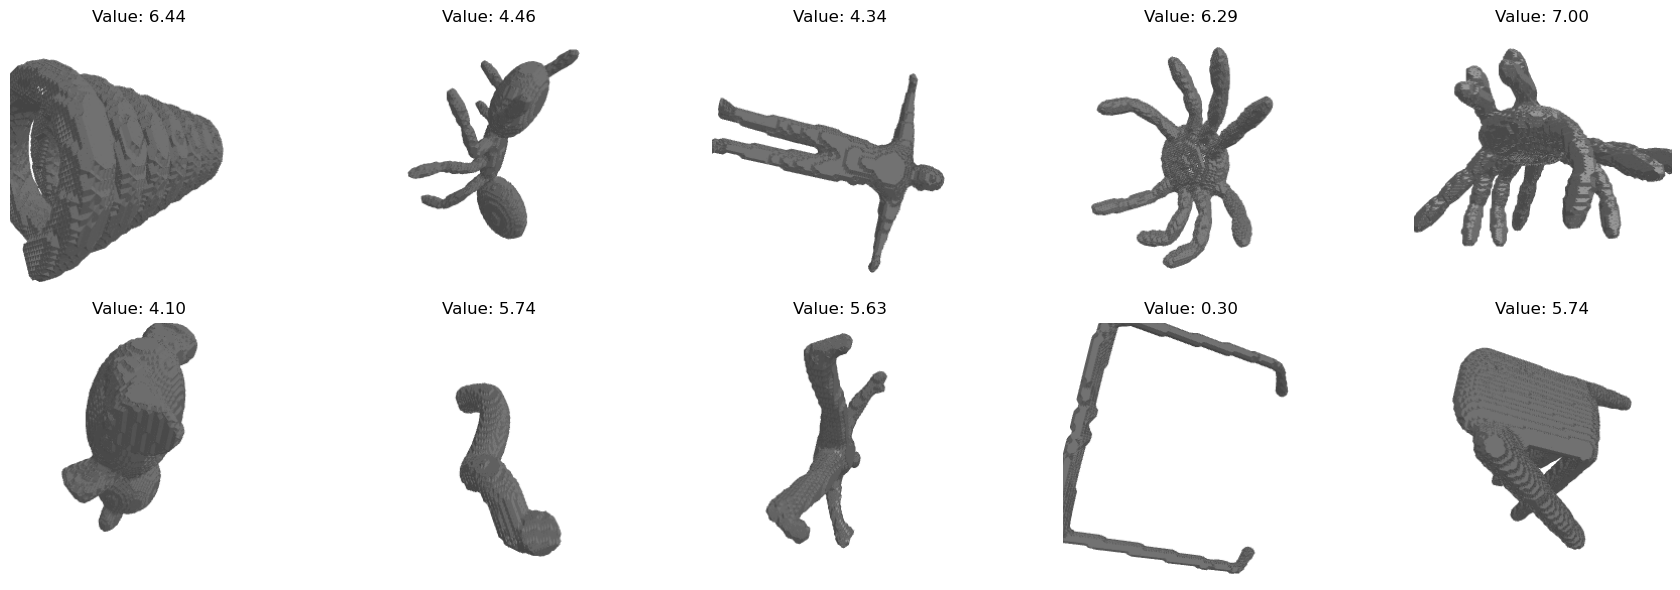

In [50]:

from PIL import Image
import matplotlib.pyplot as plt


# Take the first 10 elements of the result list
res = result[:10]

# Create a figure with subplots, 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(18, 6))

# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

# Iterate over each element in the result list
for i, element in enumerate(res):
    # Extract the image path from the last element of the sublist
    image_path_1 = element[-1]
    
    # Load and plot the first image
    img_1 = Image.open(image_path_1)
    axs[i].imshow(img_1)
    axs[i].set_title(f"Value: {element[0]:.2f}")
    axs[i].axis('off')



# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [78]:

# Iterate over each element in the result list
for i, element in enumerate(res):
    # Extract the image path from the last element of the sublist
    json_path = element[1]
    image_file = element[2]

    folders = json_path.split(os.path.sep)

    first_two_folders = os.path.join(folders[0], folders[1], folders[2])
    _, model_name = os.path.split(json_path)
    model_name = model_name.replace('LatentVector.json', '')
    
    image_path = os.path.join(first_two_folders, f"{folders[2]}Image2D", model_name, image_file)



        



../data/snakes/snakesImage2D/2/2_view_28.png
../data/snakes/snakesImage2D/27/27_view_11.png
../data/ants/antsImage2D/4/4_view_22.png
../data/ants/antsImage2D/21/21_view_26.png
../data/humans/humansImage2D/b21/b21_view_9.png
../data/humans/humansImage2D/b19/b19_view_9.png
../data/crabs/crabsImage2D/30/30_view_11.png
../data/crabs/crabsImage2D/27/27_view_11.png
../data/crabs/crabsImage2D/18/18_view_17.png
../data/crabs/crabsImage2D/6/6_view_33.png
../data/teddy/teddyImage2D/b14/b14_view_19.png
../data/teddy/teddyImage2D/b13/b13_view_26.png
../data/snakes/snakesImage2D/5/5_view_12.png
../data/snakes/snakesImage2D/10/10_view_21.png
../data/humans/humansImage2D/b4/b4_view_32.png
../data/humans/humansImage2D/b17/b17_view_10.png
../data/spectacles/spectaclesImage2D/b10/b10_view_9.png
../data/spectacles/spectaclesImage2D/b19/b19_view_9.png
../data/hands/handsImage2D/b20/b20_view_8.png
../data/hands/handsImage2D/b19/b19_view_9.png


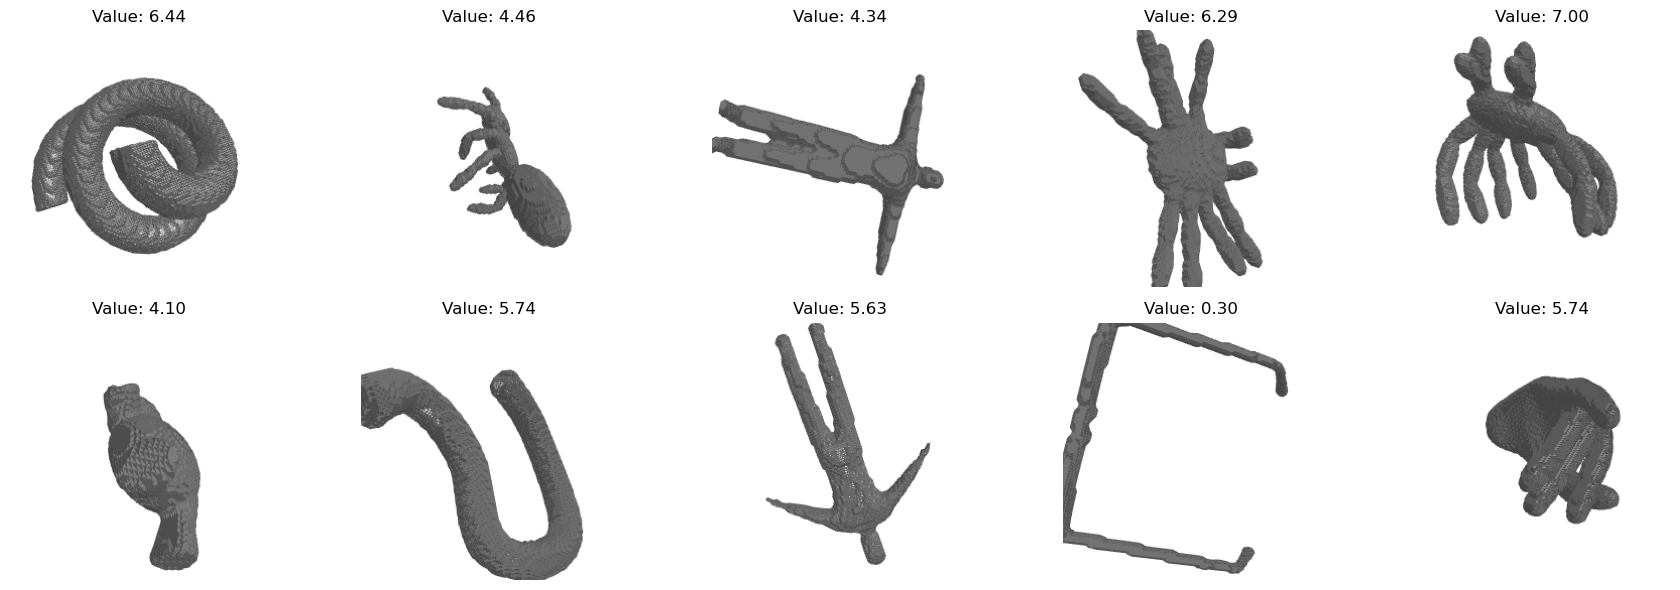

In [79]:
import os
import matplotlib.pyplot as plt
from PIL import Image


# Create a figure with subplots
fig, axs = plt.subplots(2, 5, figsize=(18, 6))

# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

# Iterate over each element in the result list
for i, element in enumerate(res):
    # Extract the image path from the last element of the sublist
    json_path = element[1]
    image_file = element[2]

    # Split the json_path to get the folders
    folders = json_path.split(os.path.sep)

    # Construct the image path dynamically
    first_two_folders = os.path.join(folders[0], folders[1], folders[2])
    _, model_name = os.path.split(json_path)
    model_name = model_name.replace('LatentVector.json', '')
    image_path = os.path.join(first_two_folders, f"{folders[2]}Image2D", model_name, image_file)

    # Load and plot the image
    img = Image.open(image_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Value: {element[0]:.2f}")
    axs[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
